In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd

project_root = Path.cwd().parent
print(f"Project root directory: {project_root}")

ROLLING_WINDOW = 50 


Project root directory: /Users/arthurreuss/code/Arthurreuss/Python/RUG/RLP/reinforcement-learning


In [2]:
def plot_training_curves(experiment_data, seed=None):
    """Plot 1: Raw Training Episodes (Smoothed)"""
    plt.figure(figsize=(10, 6))
    
    for label, files in experiment_data.items():
        path = files["train_episodes"]
        if not os.path.exists(path):
            print(f"Warning: File not found {path}")
            continue
            
        # Read JSONL file
        df = pd.read_json(path, lines=True)
        
        # Sort by step to be safe
        df = df.sort_values("step")
        
        # Calculate rolling average for 'episode_return'
        # distinct env_ids might be mixed, but for general trend, simple rolling is usually fine
        df['smoothed_return'] = df['episode_return'].rolling(window=ROLLING_WINDOW).mean()
        
        plt.plot(df['step'], df['smoothed_return'], label=label, linewidth=2)

    plt.title(f"Training Progress Seed {seed} (Smoothed window={ROLLING_WINDOW})")
    plt.xlabel("Environment Steps")
    plt.ylabel("Episode Return")
    plt.legend(title="Sparsity")
    plt.tight_layout()
    plt.savefig("plot_1_training_curves.png")
    plt.show()

def plot_sparsity_vs_performance(experiment_data, seed=None):
    """Plot 2: Sparsity vs Final Best Return"""
    sparsities = []
    scores = []
    
    # Extract numerical sparsity from the label (assuming label is "Sparsity 0.9")
    # or you can manually map them if your labels are complex.
    
    for label, files in experiment_data.items():
        path = files["final_stats"]
        if not os.path.exists(path):
            continue
            
        with open(path, 'r') as f:
            data = json.load(f)
            
        # Try to parse sparsity from label, e.g. "Sparsity 0.5" -> 0.5
        # If your labels are just numbers, this is easier.
        try:
            # Simple heuristic: extract float from string
            sparsity_val = float(''.join([c for c in label if c.isdigit() or c == '.']))
        except:
            sparsity_val = label # Fallback to string label
            
        sparsities.append(sparsity_val)
        scores.append(data.get("best_return", 0))

    plt.figure(figsize=(8, 5))
    
    # Sort data for clean line/bar plot
    if all(isinstance(x, float) for x in sparsities):
        combined = sorted(zip(sparsities, scores))
        sparsities, scores = zip(*combined)
        
    plt.plot(sparsities, scores, marker='o', linestyle='-', linewidth=2, markersize=8, color='purple')
    
    # Optional: Fill area under curve
    plt.fill_between(sparsities, scores, alpha=0.3, color='purple')

    plt.title(f"Impact of Sparsity on Final Performance Seed {seed}")
    plt.xlabel("Sparsity Level")
    plt.ylabel("Best Evaluation Return")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("plot_2_sparsity_tradeoff.png")
    plt.show()

def plot_eval_metrics(experiment_data, seed=None):
    """Plot 3: The 'Nice' Plot - Evaluation Metrics over Time"""
    plt.figure(figsize=(10, 6))
    
    for label, files in experiment_data.items():
        path = files["eval_metrics"]
        if not os.path.exists(path):
            continue
            
        df = pd.read_json(path, lines=True)
        df = df.sort_values("step")
        
        # Plot Mean Return
        # We can also fill between (mean - std) and (mean + std) for confidence interval
        plt.plot(df['step'], df['mean_return'], label=label, marker='.')
        
        # Add shading for Standard Deviation if available
        if 'std_return' in df.columns:
            plt.fill_between(df['step'], 
                             df['mean_return'] - df['std_return'], 
                             df['mean_return'] + df['std_return'], 
                             alpha=0.15)

    plt.title(f"Evaluation Performance Over Time Seed {seed}")
    plt.xlabel("Steps")
    plt.ylabel("Mean Return (Evaluation)")
    plt.legend(title="Sparsity")
    plt.tight_layout()
    plt.savefig("plot_3_eval_history.png")
    plt.show()

Generating Training Curves...


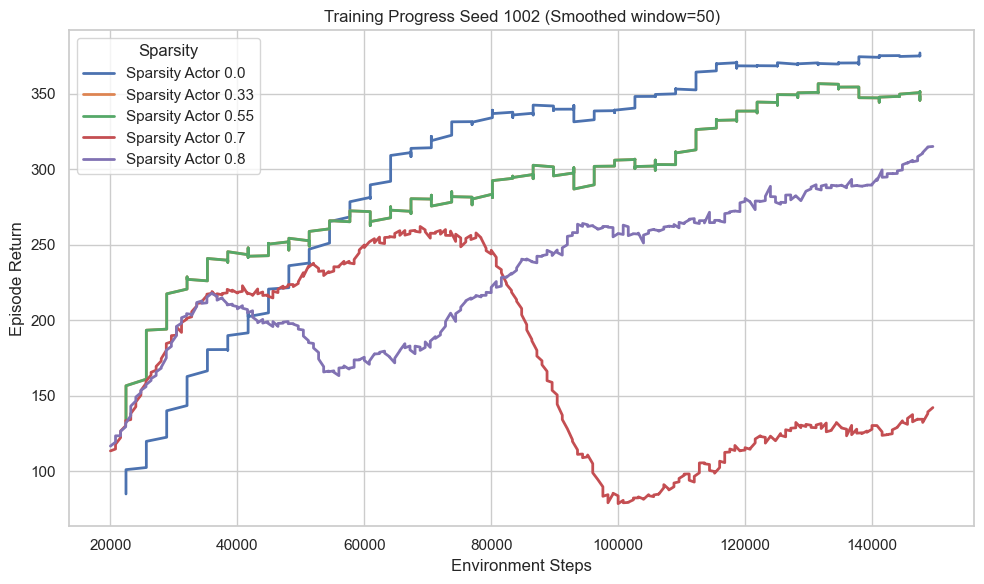

Generating Sparsity Comparison...


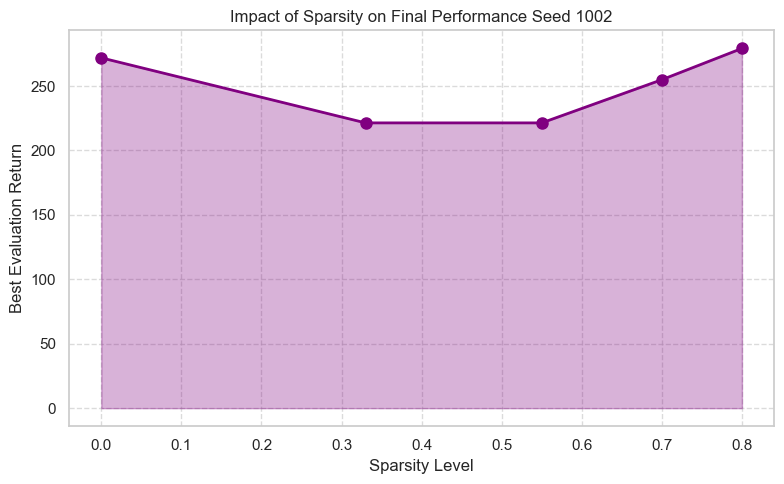

Generating Evaluation History...


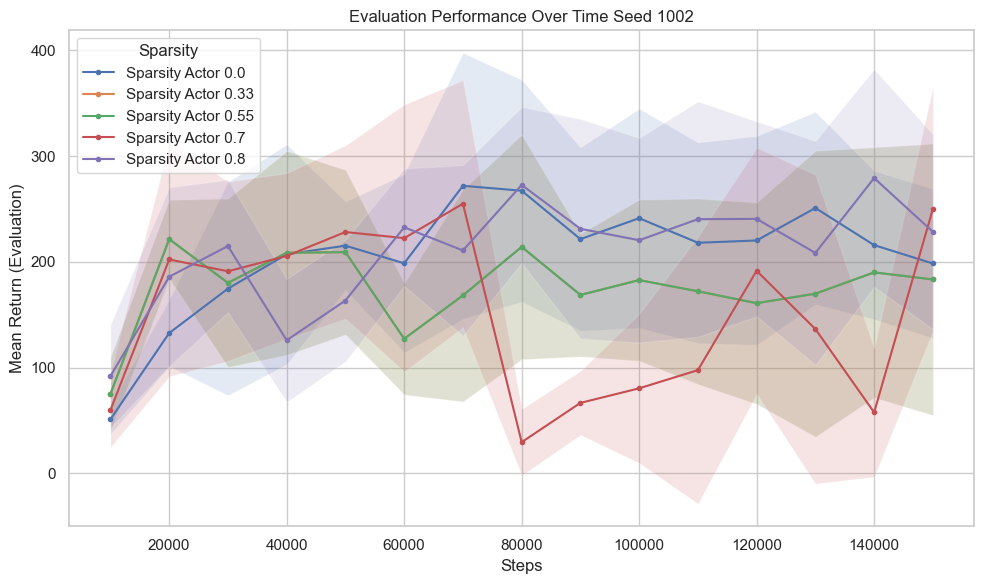

In [ ]:
from math import e
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns

# ==========================================
# 1. USER CONFIGURATION SECTION
# ==========================================

# Define your experiments here. 
# Key: The label you want in the legend (e.g., "0.0 (Dense)", "0.8 (Pruned)")
# Value: A dictionary containing paths to your 3 specific files for that run.
base_path = project_root / "data" / "experiments"
experiment_data_reach_seed_2000 = {
    "Sparsity Actor 0.0": {
        "train_episodes": base_path / "reach-v3/seed_2000/round_0/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_2000/round_0/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_2000/round_0/metrics.jsonl"
    },
    "Sparsity Actor 0.33": {
        "train_episodes": base_path / "reach-v3/seed_2000/round_1/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_2000/round_1/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_2000/round_1/metrics.jsonl"
    },
    "Sparsity Actor 0.55": {
        "train_episodes": base_path / "reach-v3/seed_2000/round_2/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_2000/round_2/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_2000/round_2/metrics.jsonl"
    },
    "Sparsity Actor 0.7": {
        "train_episodes": base_path / "reach-v3/seed_2000/round_3/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_2000/round_3/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_2000/round_3/metrics.jsonl"
    },
    "Sparsity Actor 0.8": {
        "train_episodes": base_path / "reach-v3/seed_2000/round_4/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_2000/round_4/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_2000/round_4/metrics.jsonl"
    },
}


experiment_data_reach_seed_1001 = {
    "Sparsity Actor 0.0": {
        "train_episodes": base_path / "reach-v3/seed_1001/round_0/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_1001/round_0/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_1001/round_0/metrics.jsonl"
    },
    "Sparsity Actor 0.33": {
        "train_episodes": base_path / "reach-v3/seed_1001/round_1/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_1001/round_1/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_1001/round_1/metrics.jsonl"
    },
    "Sparsity Actor 0.55": {
        "train_episodes": base_path / "reach-v3/seed_1001/round_2/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_1001/round_2/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_1001/round_2/metrics.jsonl"
    },
    "Sparsity Actor 0.7": {
        "train_episodes": base_path / "reach-v3/seed_1001/round_3/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_1001/round_3/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_1001/round_3/metrics.jsonl"
    },
    "Sparsity Actor 0.8": {
        "train_episodes": base_path / "reach-v3/seed_1001/round_4/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_1001/round_4/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_1001/round_4/metrics.jsonl"
    },
}

experiment_data_reach_seed_1002 = {
    "Sparsity Actor 0.0": {
        "train_episodes": base_path / "reach-v3/seed_1002/round_0/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_1002/round_0/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_1002/round_0/metrics.jsonl"
    },
    "Sparsity Actor 0.33": {
        "train_episodes": base_path / "reach-v3/seed_1002/round_1/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_1002/round_1/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_1002/round_1/metrics.jsonl"
    },
    "Sparsity Actor 0.55": {
        "train_episodes": base_path / "reach-v3/seed_1002/round_2/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_1002/round_2/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_1002/round_2/metrics.jsonl"
    },
    "Sparsity Actor 0.7": {
        "train_episodes": base_path / "reach-v3/seed_1002/round_3/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_1002/round_3/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_1002/round_3/metrics.jsonl"
    },
    "Sparsity Actor 0.8": {
        "train_episodes": base_path / "reach-v3/seed_1002/round_4/train_episodes.jsonl",
        "final_stats":    base_path / "reach-v3/seed_1002/round_4/training_stats.json",
        "eval_metrics":   base_path / "reach-v3/seed_1002/round_4/metrics.jsonl"
    },
}


sns.set_theme(style="whitegrid") # Make plots look professional



if __name__ == "__main__":
    print("Generating Training Curves...")
    plot_training_curves(experiment_data_reach_seed_1001, "1001")
    
    print("Generating Sparsity Comparison...")
    plot_sparsity_vs_performance(experiment_data_reach_seed_1001, "1001")
    
    print("Generating Evaluation History...")
    plot_eval_metrics(experiment_data_reach_seed_1001, "1001")